In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os


In [536]:
# Import training data & testing data
cwd = os.getcwd()
train_data_import = pd.read_csv(cwd + "./banking_train.csv", sep=";")
test_data_import = pd.read_csv(cwd + "./banking_test.csv", sep=";")

# Create copies of the original data to manipulate
train_data = train_data_import.copy()
test_data = test_data_import.copy()

## Exploratory Data Analysis
* Explore missing values
* Descriptive Statistics

In [537]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [538]:
train_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [539]:
# Descriptive statistics for the training data
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Feature Engineering
* Transform Numeric Columns: 
    * age -> age_cat
    * balance -> balance_status, balance_cat
* Transform Categorical Columns: 
    * job -> job_cat
    * month -> quarter, season

#### <b>New Features</b>: age_cat, balance_status, balance_cat, job_cat, quarter, season

### Age: age_cat
* Young_Adult: < 25
* Adult: 26 - 55
* Senior_Adult: > 55

In [540]:
train_data['age'].describe(percentiles=[.01, .05,.1,.25,.5,.75,.9,.95,.99])

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
1%          23.000000
5%          27.000000
10%         29.000000
25%         33.000000
50%         39.000000
75%         48.000000
90%         56.000000
95%         59.000000
99%         71.000000
max         95.000000
Name: age, dtype: float64

In [541]:
def age_conv(age):
    if age <= 25:
        return 'Young_Adult'
    elif age <= 55:
        return 'Adult'
    else:
        return 'Senior_Adult'

train_data['age_cat'] = train_data['age'].apply(age_conv)
test_data['age_cat'] = train_data['age'].apply(age_conv)

print('Age Category Frequency Counts')
display(train_data['age_cat'].value_counts())
print('Age Category Frequency Percentage')
display(train_data['age_cat'].value_counts(normalize=True))


Age Category Frequency Counts


Adult           38975
Senior_Adult     4900
Young_Adult      1336
Name: age_cat, dtype: int64

Age Category Frequency Percentage


Adult           0.862069
Senior_Adult    0.108381
Young_Adult     0.029550
Name: age_cat, dtype: float64

### Balance: balance_status
* Negative: < 0
* Positive: >= 0

In [542]:
train_data['balance'].describe(percentiles=[.01, .05,.1,.25,.5,.75,.9,.95,.99])

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
1%         -627.000000
5%         -172.000000
10%           0.000000
25%          72.000000
50%         448.000000
75%        1428.000000
90%        3574.000000
95%        5768.000000
99%       13164.900000
max      102127.000000
Name: balance, dtype: float64

In [543]:
train_data['balance_status'] = train_data['balance'].apply(lambda x: 'Negative' if x < 0 else 'Positive')
test_data['balance_status'] = train_data['balance'].apply(lambda x: 'Negative' if x < 0 else 'Positive')


print('Balance Status Frequency Counts')
display(train_data['balance_status'].value_counts())
print('Balance Status Frequency Percentage')
display(train_data['balance_status'].value_counts(normalize=True))

Balance Status Frequency Counts


Positive    41445
Negative     3766
Name: balance_status, dtype: int64

Balance Status Frequency Percentage


Positive    0.916702
Negative    0.083298
Name: balance_status, dtype: float64

### Balance: balance_cat
* < 0
* 0 - 1500
* > 1500

In [544]:
def balance_conv(balance):
    if balance < 0:
        return '< 0'
    elif balance <= 1500:
        return '0 - 1500'
    elif balance > 1500:
        return '> 1500'
    else:
        return 'Invalid Entry'
    
train_data['balance_cat'] = train_data['balance'].apply(balance_conv)
test_data['balance_cat'] = train_data['balance'].apply(balance_conv)


print('Balance Category Frequency Counts')
display(train_data['balance_cat'].value_counts())
print('Balance Category Frequency Percentage')
display(train_data['balance_cat'].value_counts(normalize=True))

Balance Category Frequency Counts


0 - 1500    30550
> 1500      10895
< 0          3766
Name: balance_cat, dtype: int64

Balance Category Frequency Percentage


0 - 1500    0.675721
> 1500      0.240981
< 0         0.083298
Name: balance_cat, dtype: float64

#### Job: job_cat
* blue-collar = (blue-collar, technician, services, housemaid)
* admin = (admin, management)
* unemployed/retired = (unemployed, retired, unknown)
* self-employed = (self-employed, entrepreneur) 
* student = (student)

In [545]:
def job_conv(job):
    b_collar = ['blue-collar', 'technician', 'services', 'housemaid']
    admin = ['admin.', 'management']
    unemploy = ['unemployed', 'retired', 'unknown']
    self_empl = ['self-employed', 'entrepreneur']
    student = ['student']

    if job in b_collar:
        return 'Blue_Collar'
    elif job in admin:
        return 'Administration'
    elif job in unemploy:
        return 'Unemployed/Retired'
    elif job in self_empl:
        return 'Self-Employed'
    elif job in student:
        return 'Student'
    else:
        'Invalid Category'


train_data['job_cat'] = train_data['job'].apply(job_conv)
test_data['job_cat'] = train_data['job'].apply(job_conv)

print('Job Category Frequency Counts')
display(train_data['job_cat'].value_counts())
print('Job Category Frequency Percentage')
display(train_data['job_cat'].value_counts(normalize=True))

Job Category Frequency Counts


Blue_Collar           22723
Administration        14629
Unemployed/Retired     3855
Self-Employed          3066
Student                 938
Name: job_cat, dtype: int64

Job Category Frequency Percentage


Blue_Collar           0.502599
Administration        0.323572
Unemployed/Retired    0.085267
Self-Employed         0.067815
Student               0.020747
Name: job_cat, dtype: float64

#### Seasons" -> Winter/Spring(jan-apr), Summer(may-aug), Fall/Witer(sep-dec)


In [546]:
def season_conv(month):
    win_sp = ['jan', 'feb', 'mar', 'apr']
    sum = ['may', 'jun', 'jul', 'aug']
    fall_win = ['sep', 'oct', 'nov', 'dec']
    if month in win_sp:
        return 'Winter-Spring'
    elif month in sum:
        return 'Summer'
    elif month in fall_win:
        return 'Fall-Winter'
    else:
        return 'Invalid Entry'
    
train_data['season'] = train_data['month'].apply(season_conv)
test_data['season'] = train_data['month'].apply(season_conv)


print('Season Frequency Counts')
display(train_data['season'].value_counts())
print('Season Frequency Percentage')
display(train_data['season'].value_counts(normalize=True))


Season Frequency Counts


Summer           32249
Winter-Spring     7461
Fall-Winter       5501
Name: season, dtype: int64

Season Frequency Percentage


Summer           0.713300
Winter-Spring    0.165026
Fall-Winter      0.121674
Name: season, dtype: float64

#### Quarter: Q1, Q2, Q3, Q4

In [547]:
def quart_conv(month):
    q1 = ['jan', 'feb', 'mar']
    q2 = ['apr', 'may', 'jun']
    q3 = ['jul', 'aug','sep']
    q4 = ['oct', 'nov', 'dec']
    if month in q1:
        return 'Q1'
    elif month in q2:
        return 'Q2'
    elif month in q3:
        return 'Q3'
    elif month in q4:
        return 'Q4'
    else:
        return 'Invalid Entry'
    
train_data['quarter'] = train_data['month'].apply(quart_conv)
test_data['quarter'] = train_data['month'].apply(quart_conv)


print('Quarter Frequency Counts')
display(train_data['quarter'].value_counts())
print('Quarter Frequency Percentage')
display(train_data['quarter'].value_counts(normalize=True))

Quarter Frequency Counts


Q2    22039
Q3    13721
Q4     4922
Q1     4529
Name: quarter, dtype: int64

Quarter Frequency Percentage


Q2    0.487470
Q3    0.303488
Q4    0.108867
Q1    0.100175
Name: quarter, dtype: float64

#### Rename Target Variable Column
Target Variable: y -> term_deposit

In [548]:
train_data = train_data.rename(columns={'y':'term_deposit'})
test_data = test_data.rename(columns={'y':'term_deposit'})


display(train_data['term_deposit'].value_counts())
display(train_data['term_deposit'].value_counts(normalize=True))

no     39922
yes     5289
Name: term_deposit, dtype: int64

no     0.883015
yes    0.116985
Name: term_deposit, dtype: float64

## Numeric Variable vs Target Variable Analysis

In [549]:
num_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for var in num_vars:
    print(f'{var.upper()} vs Term Deposit Statistics')
    display(pd.pivot_table(index='term_deposit', values=var, data=train_data, aggfunc=['min','mean', 'max']))
    display(train_data[var].describe())
    print('')

AGE vs Term Deposit Statistics


,min,mean,max
,age,age,age
term_deposit,,,
no,18,40.838986,95
yes,18,41.670070,95


count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


BALANCE vs Term Deposit Statistics


,min,mean,max
,balance,balance,balance
term_deposit,,,
no,-8019,1303.714969,102127
yes,-3058,1804.267915,81204


count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


DURATION vs Term Deposit Statistics


,min,mean,max
,duration,duration,duration
term_deposit,,,
no,0,221.182806,4918
yes,8,537.294574,3881


count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


CAMPAIGN vs Term Deposit Statistics


,min,mean,max
,campaign,campaign,campaign
term_deposit,,,
no,1,2.846350,63
yes,1,2.141047,32


count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


PDAYS vs Term Deposit Statistics


,min,mean,max
,pdays,pdays,pdays
term_deposit,,,
no,-1,36.421372,871
yes,-1,68.702968,854


count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


PREVIOUS vs Term Deposit Statistics


,min,mean,max
,previous,previous,previous
term_deposit,,,
no,0,0.502154,275
yes,0,1.170354,58


count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

## Categorical Variable vs Target Variable Analysis

Text(0.5, 1.0, 'Term Deposit Campaign Success vs Failure (Monthly)')

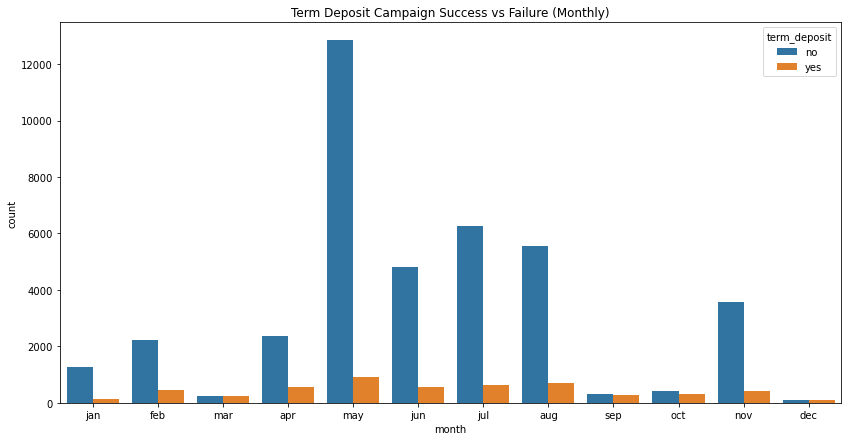

In [550]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(data=train_data, x='month', hue='term_deposit', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Term Deposit Campaign Success vs Failure (Monthly)')

Text(0.5, 1.0, 'Term Deposit Campaign Success vs Failure (Quarterly)')

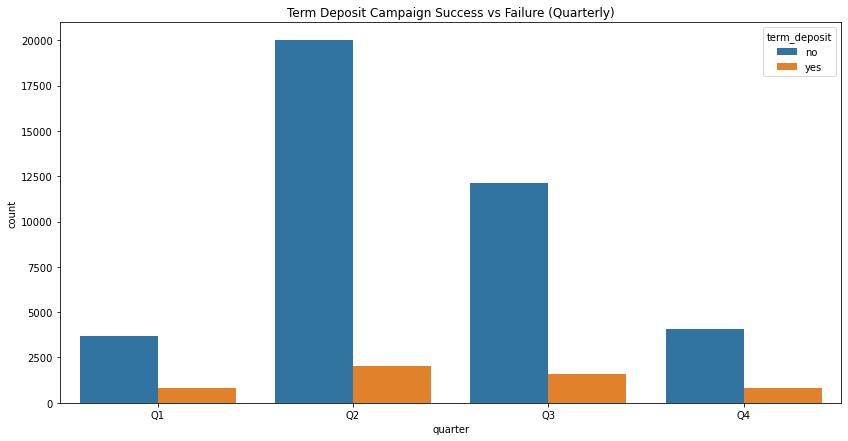

In [551]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(data=train_data, x='quarter', hue='term_deposit', order=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Term Deposit Campaign Success vs Failure (Quarterly)')

Text(0.5, 1.0, 'Term Deposit Campaign Success vs Failure (Sesonal)')

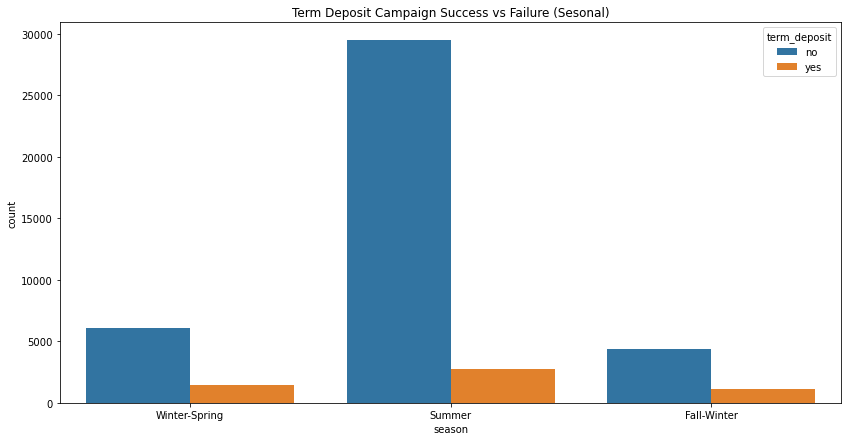

In [552]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(data=train_data, x='season', hue='term_deposit', order=['Winter-Spring', 'Summer', 'Fall-Winter'])
plt.title('Term Deposit Campaign Success vs Failure (Sesonal)')

### Categorical Variables vs Target Variable Crosstabs

In [553]:
cat_vars = ['age_cat', 'balance_status', 'balance_cat', 'job_cat', 'season', 'quarter', 'marital', 
            'default', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

for var in cat_vars:
    print(f'{var.upper()} vs Term Deposit Crosstab')
    display(pd.crosstab(train_data[var], train_data['term_deposit'], normalize='index'))

AGE_CAT vs Term Deposit Crosstab


term_deposit,no,yes
age_cat,,
Adult,0.895754,0.104246
Senior_Adult,0.815102,0.184898
Young_Adult,0.760479,0.239521


BALANCE_STATUS vs Term Deposit Crosstab


term_deposit,no,yes
balance_status,,
Negative,0.944238,0.055762
Positive,0.877452,0.122548


BALANCE_CAT vs Term Deposit Crosstab


term_deposit,no,yes
balance_cat,,
0 - 1500,0.891948,0.108052
< 0,0.944238,0.055762
> 1500,0.836806,0.163194


JOB_CAT vs Term Deposit Crosstab


term_deposit,no,yes
job_cat,,
Administration,0.867934,0.132066
Blue_Collar,0.910839,0.089161
Self-Employed,0.898891,0.101109
Student,0.713220,0.286780
Unemployed/Retired,0.804929,0.195071


SEASON vs Term Deposit Crosstab


term_deposit,no,yes
season,,
Fall-Winter,0.800945,0.199055
Summer,0.913610,0.086390
Winter-Spring,0.811285,0.188715


QUARTER vs Term Deposit Crosstab


term_deposit,no,yes
quarter,,
Q1,0.816516,0.183484
Q2,0.907074,0.092926
Q3,0.884557,0.115443
Q4,0.832182,0.167818


MARITAL vs Term Deposit Crosstab


term_deposit,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


DEFAULT vs Term Deposit Crosstab


term_deposit,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


EDUCATION vs Term Deposit Crosstab


term_deposit,no,yes
education,,
primary,0.913735,0.086265
secondary,0.894406,0.105594
tertiary,0.849936,0.150064
unknown,0.864297,0.135703


HOUSING vs Term Deposit Crosstab


term_deposit,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


LOAN vs Term Deposit Crosstab


term_deposit,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


CONTACT vs Term Deposit Crosstab


term_deposit,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


MONTH vs Term Deposit Crosstab


term_deposit,no,yes
month,,
apr,0.803206,0.196794
aug,0.889867,0.110133
dec,0.532710,0.467290
feb,0.833522,0.166478
jan,0.898788,0.101212
jul,0.909065,0.090935
jun,0.897772,0.102228
mar,0.480084,0.519916
may,0.932805,0.067195


POUTCOME vs Term Deposit Crosstab


term_deposit,no,yes
poutcome,,
failure,0.873903,0.126097
other,0.833152,0.166848
success,0.352747,0.647253
unknown,0.908385,0.091615


### Excessive campaign attempts in the Summer months were unsuccessful: Subset this data and explore for explanations.

In [554]:
summer_data = train_data[train_data['season'] == 'Summer'].copy()

summer_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,term_deposit,age_cat,balance_status,balance_cat,job_cat,season,quarter
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Senior_Adult,Positive,> 1500,Administration,Summer,Q2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Adult,Positive,0 - 1500,Blue_Collar,Summer,Q2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Adult,Positive,0 - 1500,Self-Employed,Summer,Q2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Adult,Positive,> 1500,Blue_Collar,Summer,Q2
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Adult,Positive,0 - 1500,Unemployed/Retired,Summer,Q2


In [555]:
summer_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000
mean,40.706844,1177.145090,15.680734,253.951874,3.078359,28.079661,0.364197
std,10.048975,2755.522147,8.255954,253.355179,3.484234,91.355044,1.583427
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,42.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,367.000000,15.000000,176.000000,2.000000,-1.000000,0.000000
75%,48.000000,1232.000000,22.000000,313.000000,4.000000,-1.000000,0.000000
max,93.000000,102127.000000,31.000000,3881.000000,63.000000,828.000000,58.000000


In [556]:
train_data.groupby('job_cat')['balance'].agg(['min', 'mean', 'max']).reset_index()

,job_cat,min,mean,max
0,Administration,-6847,1541.712421,102127
1,Blue_Collar,-8019,1139.104036,66653
2,Self-Employed,-3313,1586.618395,59649
3,Student,-679,1388.060768,24025
4,Unemployed/Retired,-1598,1812.071855,81204


In [557]:
summer_data.groupby('job_cat')['balance'].agg(['min', 'mean', 'max']).reset_index()

,job_cat,min,mean,max
0,Administration,-6847,1364.574187,102127
1,Blue_Collar,-8019,1008.832048,66653
2,Self-Employed,-3313,1379.226764,52587
3,Student,-679,1200.382692,23878
4,Unemployed/Retired,-1598,1448.813397,32948


#### Check for Multicollinearity

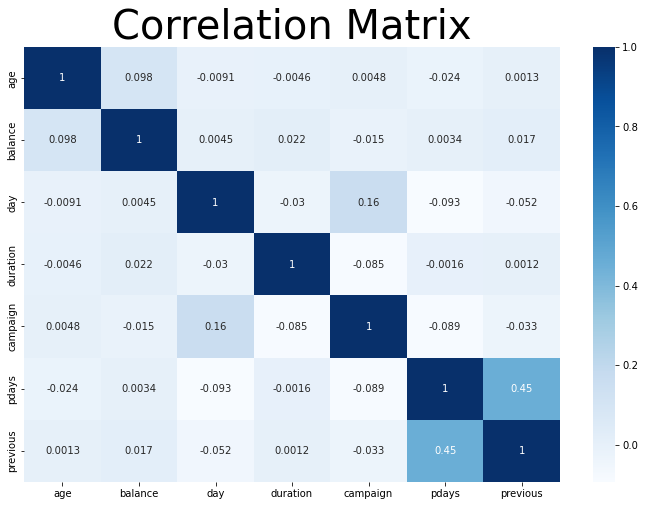

In [558]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('Correlation Matrix', fontsize=40)
sns.heatmap(train_data.corr(), cmap="Blues", annot=True)
plt.show()

## Term Deposit Analysis: <u>Model Selection</u> using <b>10-Fold Cross-Validation</b>
### Models:
* Logistic Regression
* Random Forest Classifier
* Gradient Boosting Classifier
* XG Boost
* Support Vector Machine
* Naive Bayes

In [559]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#### Subset a split the data into Training & Test sets

In [560]:
train_data = train_data[['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','month', 'duration', 
                         'campaign', 'previous', 'poutcome', 'term_deposit', 'age_cat', 'balance_status', 'balance_cat', 
                         'job_cat', 'season', 'quarter']].copy()

test_data = train_data[['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','month', 'duration', 
                         'campaign', 'previous', 'poutcome', 'term_deposit', 'age_cat', 'balance_status', 'balance_cat', 
                         'job_cat', 'season', 'quarter']].copy()

train_data['term_deposit'] = train_data['term_deposit'].apply(lambda x: 1 if x == 'yes' else 0)
test_data['term_deposit'] = test_data['term_deposit'].apply(lambda x: 1 if x == 'yes' else 0)


X_train = train_data.drop('term_deposit', axis=1).copy()
X_test = test_data.drop('term_deposit', axis=1).copy()
y_train = train_data['term_deposit']
y_test = test_data['term_deposit']


#### Create Pipeline for Data Processing

In [561]:
ohe = OneHotEncoder()
scaler = StandardScaler()

cat_transformer = Pipeline(steps=[('ohe', OneHotEncoder())])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])                                 

cat_train_cols = X_train.select_dtypes(include=['object']).columns
cat_test_cols = X_test.select_dtypes(include=['object']).columns

num_train_cols = X_train.select_dtypes(exclude=['object']).columns
num_test_cols = X_test.select_dtypes(exclude=['object']).columns


processor = ColumnTransformer(transformers=[('cat_trans', cat_transformer, cat_train_cols), 
                                            ('num_trans', num_transformer, num_train_cols)
                                        ])

X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

### Determine the best model using 10-Fold Cross Validation (Accuracy Scores)
1. Gradient Boost has the AUC score. 2nd highest accuracy score.
2. Logistic Regression has the highest accuracy.2nd highest AUC score.

In [ ]:
lr = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
sv = SVC(random_state=42)
nb = GaussianNB()
xgb = XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='error')

In [562]:
model_map = {lr:'Logistic Regression', rf:'Random Forest', gb:'Gradient Boost', nb:'Gausian Naive Bayes', xgb:'XGBoost'}

for index, model in enumerate(model_map):
    cv_score = cross_val_score(model, X_train_processed, y_train, cv=10)
    cv_avg = (round(cv_score.mean(), 2)) * 100
    print(model_map[model] + f" Cross Validation Score: {cv_avg}")

Logistic Regression Cross Validation Score: 82.0
Random Forest Cross Validation Score: 76.0
Gradient Boost Cross Validation Score: 79.0
Gausian Naive Bayes Cross Validation Score: 61.0
XGBoost Cross Validation Score: 77.0


In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [.03, .04, .05],  # Learning rate
    'n_estimators': [700, 750, 800],  # Number of trees in the forest
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
}


# Perform Randomized grid search cross-validation
grid_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, cv=5, scoring='roc_auc', error_score='raise')
grid_search.fit(X_train_processed, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

KeyboardInterrupt: 

### 10-Fold Cross Validation (AUC Scores)
<b>XGBoost</b>

In [563]:
for index, model in enumerate(model_map):
    cv_score = cross_val_score(model, X_train_processed, y_train, cv=10, scoring='roc_auc')
    cv_avg = (round(cv_score.mean(), 2)) * 100
    print(model_map[model] + f" Cross Validation Score: {cv_avg}")

Logistic Regression Cross Validation Score: 73.0
Random Forest Cross Validation Score: 67.0
Gradient Boost Cross Validation Score: 75.0
Gausian Naive Bayes Cross Validation Score: 60.0
XGBoost Cross Validation Score: 72.0


### Hyperparameter Tuning using Grid Search Cross-Validation

In [564]:
# Define the parameter grid for grid search
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [.03, .04, .05],  # Learning rate
    'n_estimators': [700, 750, 800],  # Number of trees in the forest
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
}


# Perform Randomized grid search cross-validation
grid_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, cv=5, scoring='roc_auc', error_score='raise')
grid_search.fit(X_train_processed, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

KeyboardInterrupt: 

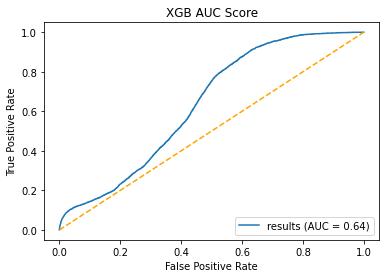

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=700, learning_rate=0.03, max_depth=3, loss='log_loss', random_state=42)

y_prob = cross_val_predict(gb_model, X_train_processed, y_train, cv=5, method='predict_proba')
y_scores = y_prob[:, 1]

gb_fit = gb_model.fit(X_train_processed, y_train)
y_pred = gb_fit.predict(X_test_processed)


# Make predictions for XGBoost
#test_data['pred'] = xgb_model.predict(X_test_processed)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(y_train, y_scores)


# ROC Curve Plot Function
def plot_roc(fpr,tpr, title):
    
    # AUC score
    auc_score = skm.auc(fpr,tpr)
    
    # ROC curve
    skm.RocCurveDisplay(fpr=fpr, tpr=tpr,
                        roc_auc=auc_score,
                        estimator_name='results').plot()
    
    # Add title to ROC curve
    plt.title(title)
    
    # Add the diagonal line
    plt.plot([0, 1], [0, 1], 
             color='orange', 
             linestyle='--')

# Display ROC Curve w/ AUC Score
plot_roc(fpr,tpr, title='XGB AUC Score')

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     39922
           1       0.69      0.46      0.56      5289

    accuracy                           0.91     45211
   macro avg       0.81      0.72      0.75     45211
weighted avg       0.90      0.91      0.91     45211



<b>Logistic Regression</b>

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'solver' : ['lbfgs', 'newton-cg', 'saga'],  
    'class_weight' : ['balanced', None],  
}


# Perform Randomized grid search cross-validation
grid_search = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=5, scoring='roc_auc', error_score='raise')
grid_search.fit(X_train_processed, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [ ]:
lr_model = LogisticRegression(n_estimators=700, learning_rate=0.03, max_depth=3, loss='log_loss', random_state=42)

y_prob = cross_val_predict(gb_model, X_train_processed, y_train, cv=5, method='predict_proba')
y_scores = y_prob[:, 1]

gb_fit = gb_model.fit(X_train_processed, y_train)
y_pred = gb_fit.predict(X_test_processed)


# Make predictions for XGBoost
#test_data['pred'] = xgb_model.predict(X_test_processed)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(y_train, y_scores)


# ROC Curve Plot Function
def plot_roc(fpr,tpr, title):
    
    # AUC score
    auc_score = skm.auc(fpr,tpr)
    
    # ROC curve
    skm.RocCurveDisplay(fpr=fpr, tpr=tpr,
                        roc_auc=auc_score,
                        estimator_name='results').plot()
    
    # Add title to ROC curve
    plt.title(title)
    
    # Add the diagonal line
    plt.plot([0, 1], [0, 1], 
             color='orange', 
             linestyle='--')

# Display ROC Curve w/ AUC Score
plot_roc(fpr,tpr, title='XGB AUC Score')

array([[0.98377921, 0.01622079],
       [0.99271519, 0.00728481],
       [0.9967261 , 0.0032739 ],
       ...,
       [0.01646268, 0.98353732],
       [0.82901131, 0.17098869],
       [0.84309322, 0.15690678]])

In [ ]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi